# Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get the BCHI Dataset

In [2]:
!cp -r /content/drive/MyDrive/PhD/BCHI_Dataset.zip /content/


In [3]:
!unzip /content/BCHI_Dataset.zip -d /content/


Archive:  /content/BCHI_Dataset.zip
  inflating: /content/BCHI Dataset /Grade_3/G33777Bi.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G31748Ai.JPG  
  inflating: /content/BCHI Dataset /Grade_3/06224550.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G31748Bb.JPG  
  inflating: /content/BCHI Dataset /Grade_3/06224732.JPG  
  inflating: /content/BCHI Dataset /Grade_3/06224455.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G33777Bh.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G31748Gc.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G31748Aj.JPG  
  inflating: /content/BCHI Dataset /Grade_3/06224139.JPG  
  inflating: /content/BCHI Dataset /Grade_3/06224220.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G31748Ad.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G31748Bc.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G33777Bj.JPG  
  inflating: /content/BCHI Dataset /Grade_3/G31748Ag.JPG  
  inflating: /content/BCHI Dataset /Grade_3/06224928.JPG  
  inflating: /conten

# Generate the Average Image for BCHI Image

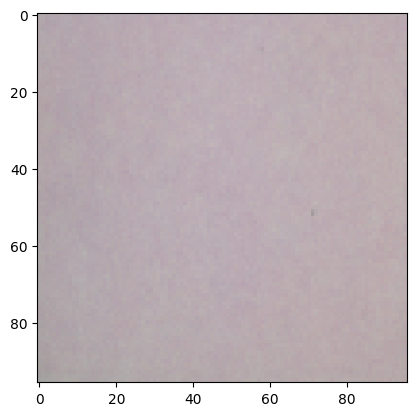

In [6]:
import numpy as np
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
import os

# Define the image size
size = 96

# Define the base directory path
base_dir = "/content/BCHI Dataset "

# Supported image file formats
image_formats = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # Add more formats if needed

# Initialize counters
total_count = 0
total_image = np.zeros((size, size, 3), np.float64)

# Iterate through each subfolder in the base directory
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Initialize counters for this subfolder
        folder_count = 0
        subfolder_image = np.zeros((size, size, 3), np.float64)

        # Iterate through the files in this subfolder
        for filename in os.listdir(subfolder_path):
            if any(filename.lower().endswith(image_format) for image_format in image_formats):
                image_path = os.path.join(subfolder_path, filename)
                image = tf.io.read_file(image_path)
                image = tf.image.decode_image(image, channels=3)  # Automatically detects image format
                image = tf.image.resize(image, (size, size))
                imarr = np.array(image, dtype=np.float64)
                subfolder_image = subfolder_image + imarr
                folder_count += 1

        # Accumulate counts and images from all subfolders
        total_count += folder_count
        total_image += subfolder_image

# Calculate the average image for all images in all subfolders
average_image = total_image / total_count

# Round values in the array and cast as 8-bit integer
average_image = np.array(np.round(average_image), dtype=np.uint8)

# Generate, save, and preview the final average image
out = PIL.Image.fromarray(average_image, mode="RGB")
out.save("Overall_Average.png")
plt.imshow(out)


In [7]:
from sklearn.metrics import mean_squared_error

# functions that identify the most dominant colour from an image
def find_dominant_color_filename(filename):
        #Resizing parameters
        width, height = 96,96
        image = PIL.Image.open(filename)
        image = image.resize((width, height),resample = 0)
        #Get colors from image object
        pixels = image.getcolors(width * height)
        #Sort them by count number(first element of tuple)
        sorted_pixels = sorted(pixels, key=lambda t: t[0])
        #Get the most frequent color
        dominant_color = sorted_pixels[-1][1]
        return dominant_color

def find_dominant_color_numpy(image):
        #Resizing parameters
        image = PIL.Image.fromarray(np.uint8(image)).convert('RGB')
        #Get colors from image object
        pixels = image.getcolors(96 * 96)
        #Sort them by count number(first element of tuple)
        sorted_pixels = sorted(pixels, key=lambda t: t[0])
        #Get the most frequent color
        dominant_color = sorted_pixels[-1][1]
        return dominant_color

# Use MSE to find the dominant colour of the image which is closest to the average image

In [8]:
import numpy as np
import tensorflow as tf
import PIL
from sklearn.metrics import mean_squared_error
import os

# Define the image size
size = 96

# Load the Overall_Average.png
average_image = PIL.Image.open("Overall_Average.png")

# Convert the average image to (R, G, B) arrays
average_image = np.array(average_image)

# Flatten and normalize the average image
average_image_flatten = average_image.flatten() / 255

# Initialize variables to store the most similar image and its MSE value
most_similar_image = None
lowest_mse = None

# Define the base directory path
base_dir = "/content/BCHI Dataset "

# Supported image file formats
image_formats = (".jpg", ".jpeg", ".png", ".bmp", ".gif")  # Add more formats if needed

# Iterate through each subfolder in the base directory
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Iterate through the files in this subfolder
        for filename in os.listdir(subfolder_path):
            if any(filename.lower().endswith(image_format) for image_format in image_formats):
                image_path = os.path.join(subfolder_path, filename)


                # Load the image
                image = PIL.Image.open(image_path)
                image = image.resize((size, size), resample=0)

                # Convert the image to (R, G, B) arrays
                target_image = np.array(image)

                # Flatten and normalize the target image
                target_image_flatten = target_image.flatten() / 255

                # Calculate the MSE between the average image and the target image
                mse = mean_squared_error(average_image_flatten, target_image_flatten)

                # Update the most similar image if this MSE is lower
                if lowest_mse is None or mse < lowest_mse:
                    lowest_mse = mse
                    most_similar_image = image
                    print(image_path)

# Save the most similar image
most_similar_image.save("Most_Similar_Image.png")


/content/BCHI Dataset /Grade_1/01211605.JPG
/content/BCHI Dataset /Grade_1/01211643.JPG
/content/BCHI Dataset /Grade_1/01212138.JPG
/content/BCHI Dataset /Grade_1/03121231.JPG
/content/BCHI Dataset /Grade_2/01120143.JPG


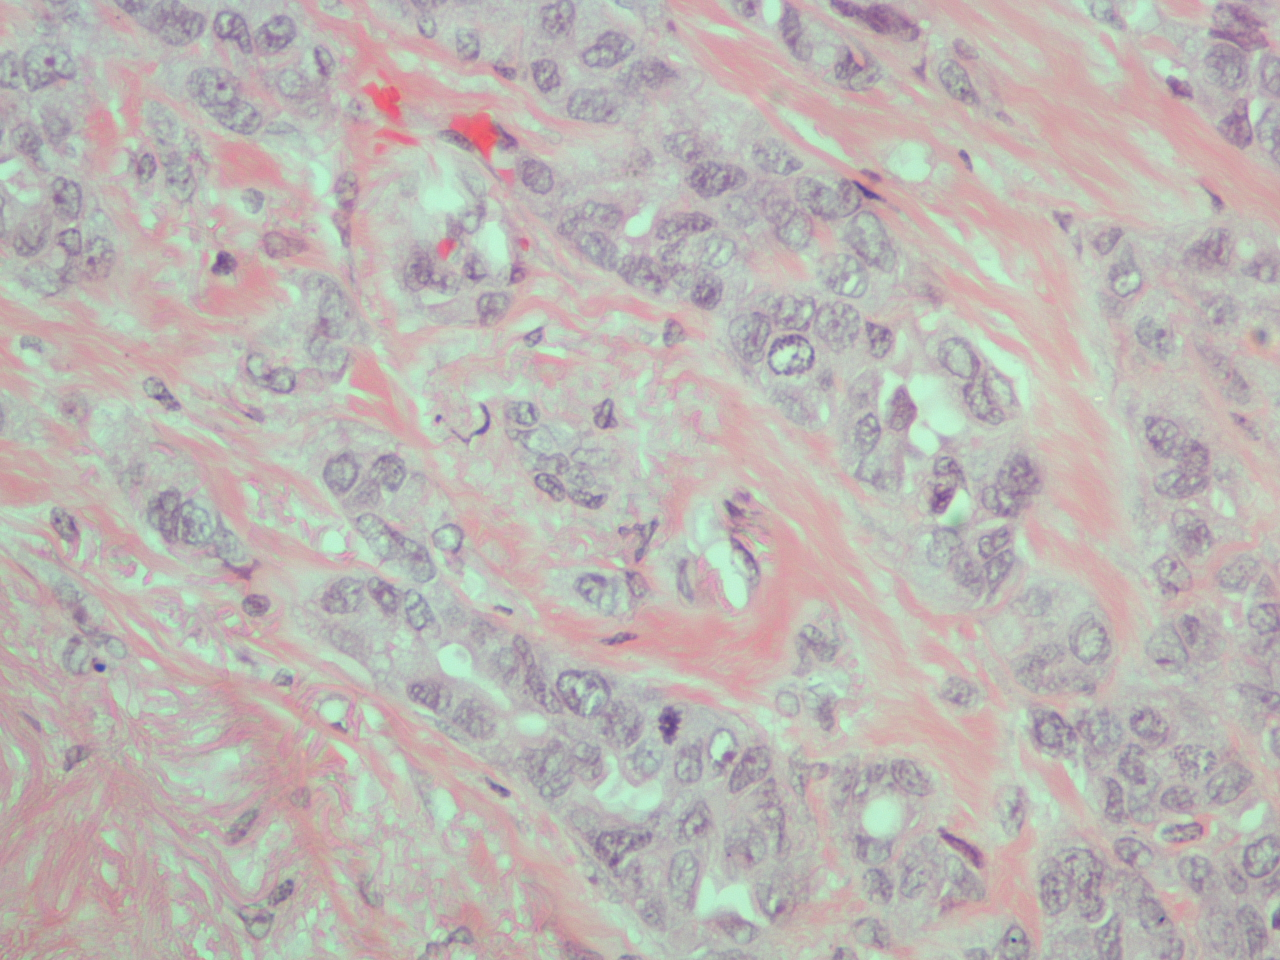

In [16]:
from IPython.display import Image, display

# Define the path to the image
image_path = "/content/BCHI Dataset /Grade_2/01120143.JPG"

# Display the image in the Colab notebook
display(Image(filename=image_path))